# **An analysis of the COVID-19 Pandemic**




(Marco Huang 2022)
(Jingyun Li  2022)
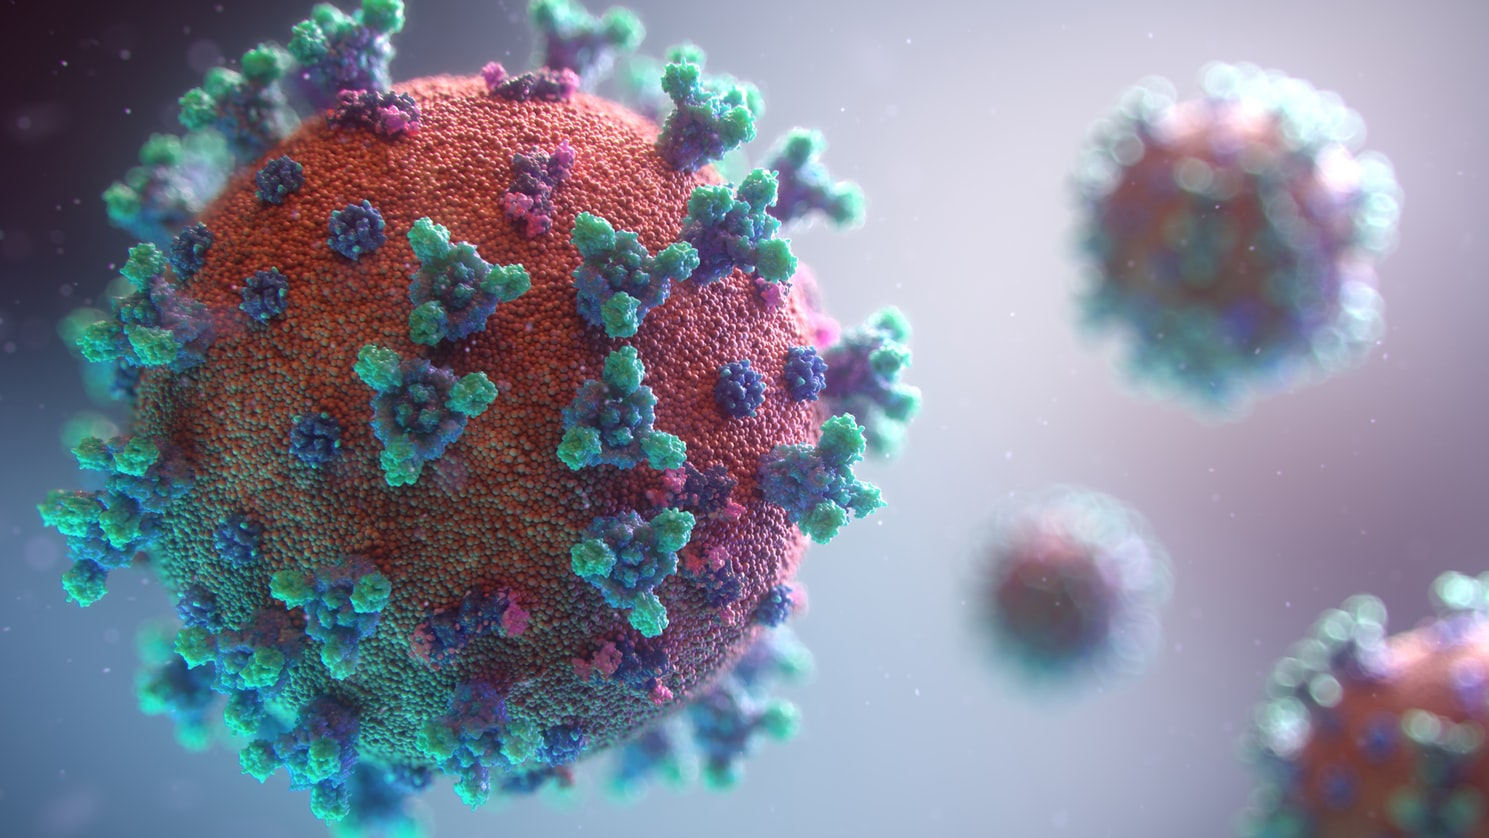
## Introduction

> COVID-19 is a disease caused by SARS-CoV-2, the coronavirus that emerged in December 2019. COVID-19 can be severe, and has caused millions of deaths around the world as well as long-lasting health problems in some who have survived the illness. The coronavirus is contagious and can be spread from person to person. It can also be diagnosed with a test.

Three years after the break out of the coronavirus, the positivity rate seems to have slowed down, providing an opportune moment to examine the pandemic as a whole. Here in part one, we will look at COVID within the United States, and COVID within several states in specific, and discuss what the data illustrates to us. Then, in part two, we're going to look at the relationship between poitivity rates and housing prices. Then, finally in part three, we will draw our conclusions of based off the data.


## **Part 1:** About COVID-19

###1. Data Collection

In this project the Covid-19 data we used comes from Johns Hopkins University and is available at this link: https://github.com/CSSEGISandData/COVID-19

#### 1.1 Tool used
We used the following tools to collect this data: pandas, numpy, matplotlib, plotly, scipy, sklearn, statsmodel, os, and more.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import os
import scipy.stats as stats
from statsmodels.formula.api import ols as o
from sklearn import linear_model
import re
warnings.filterwarnings('ignore')

####1.2 Data processing
**1.2.2 US overall**

We want to first look at the overall deaths and confirmed cases in the US. Here we read the data of the confirmed covid cases throughout the whole world from 1/22/20 till today. For this project, We would focus on the united states.

Below is the global confirmation data. It includes all the countries, their latitude, longitude, and the daily cumulative confirmation.

In [ ]:
world_conf = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv", sep=',')
world_conf


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/5/23,2/6/23,2/7/23,2/8/23,2/9/23,2/10/23,2/11/23,2/12/23,2/13/23,2/14/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,208627,208704,208721,208771,208771,208943,208971,208982,209011,209036
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334211,334211,334211,334222,334229,334229,334234,334255,334255,334264
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271394,271395,271399,271403,271406,271406,271409,271409,271409,271409
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47850,47850,47850,47850,47860,47860,47860,47860,47860,47860
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105184,105184,105184,105184,105184,105184,105184,105184,105184,105184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,341573,341690,341690,341936,342114,342114,342288,342288,342317,342317


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We first extracted the confirmation data for the US from the world data frame. We then calculated the increases of confirmed covid cases for every day in between and transposed it afterward.

In [ ]:
# melting the dataframe
us_conf = pd.melt(world_conf, ['Province/State','Country/Region', 'Lat', 'Long'], var_name="Date", value_name='conf_cases')

# some basic data cleaning to get rid variables that we won't use
us_conf = us_conf.drop(columns=['Province/State', 'Lat', 'Long'])
us_conf = us_conf.rename(columns={'Country/Region': 'Country'})
us_conf["Date"] = pd.to_datetime(us_conf['Date'])

# grouping all countries and dates together
us_conf = us_conf.groupby(['Country', 'Date']).sum()

# creating a intermediate variable that could help calculate the daily increase
us_conf["Next_day"] = us_conf['conf_cases'].shift(fill_value=0)
us_conf["conf_change"]= us_conf['conf_cases'] - us_conf['Next_day']
us_conf = us_conf.drop(columns=['Next_day'])
us_conf = us_conf.reset_index()
us_conf = us_conf[us_conf["conf_change"] >= 0]

# keeping the US only in our dataset
us_conf = us_conf[us_conf["Country"]=="US"]
us_conf = us_conf.set_index("Date")
us_conf = us_conf.drop(columns=['Country'])
us_conf


,conf_cases,conf_change
Date,,
2020-01-23,1,0
2020-01-24,2,1
2020-01-25,2,0
2020-01-26,5,3
2020-01-27,5,0
...,...,...
2023-02-10,102850919,13818
2023-02-11,102855163,4244
2023-02-12,102857632,2469


Below is the global death data. It includes all the countries, their latitude, longitude, and the daily cumulative death rates among all these countries.

In [ ]:
world_death = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv", sep=',')
world_death


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/5/23,2/6/23,2/7/23,2/8/23,2/9/23,2/10/23,2/11/23,2/12/23,2/13/23,2/14/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3596,3596,3596,3596,3596,3596,3596,3596,3596,3596
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1931,1931,1931,1931,1931,1931,1931,1931,1931,1931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4049,4049,4049,4049,4050,4050,4051,4051,4051,4051


We did the same thing for the death data -- we calculated the increase of death cases for every day in between and transposed it afterward.

In [ ]:
# melting the dataframe
us_death = pd.melt(world_death, ['Province/State','Country/Region', 'Lat', 'Long'], var_name="Date", value_name='death_cases')

# some basic data cleaning to get rid variables that we won't use
us_death = us_death.drop(columns=['Province/State', 'Lat', 'Long'])
us_death = us_death.rename(columns={'Country/Region': 'Country'})
us_death["Date"] = pd.to_datetime(us_death['Date'])
us_death = us_death.groupby(['Country', 'Date']).sum()

# creating a intermediate variable that could help calculate the daily increase
us_death["Next_day"] = us_death['death_cases'].shift(fill_value=0)
us_death["death_change"]= us_death['death_cases'] - us_death['Next_day']
us_death = us_death.drop(columns=['Next_day'])
us_death = us_death.reset_index()
us_death = us_death[us_death["death_change"] >= 0]

# keeping the US only in our dataset
us_death = us_death[us_death["Country"]=="US"]
us_death = us_death.set_index("Date")
us_death = us_death.drop(columns=['Country'])
us_death.head()

,death_cases,death_change
Date,,
2020-01-22,0,0
2020-01-23,0,0
2020-01-24,0,0
2020-01-25,0,0
2020-01-26,0,0


We then joined the tables into a data frame us_overall. The new data frame has confirmed cases, daily confirmed case rate changes, deaths, and daily death rate changes all in one.

In [ ]:
us_overall = us_conf.join(us_death, how='outer')
us_overall


,conf_cases,conf_change,death_cases,death_change
Date,,,,
2020-01-22,NaN,NaN,0.0,0.0
2020-01-23,1.0,0.0,0.0,0.0
2020-01-24,2.0,1.0,0.0,0.0
2020-01-25,2.0,0.0,0.0,0.0
2020-01-26,5.0,3.0,0.0,0.0
...,...,...,...,...
2023-02-10,102850919.0,13818.0,1114398.0,99.0
2023-02-11,102855163.0,4244.0,1114428.0,30.0
2023-02-12,102857632.0,2469.0,1114434.0,6.0


**1.2.2 US states**

Below are the confirmed cases in each representative state of the United States.
Below are the states we picked for this project, we selected one state for each of the 9 regions as its represntative.

* New England: Maine
* Middle Atlantic: New York
* East North Central: Wisconsin
* West North Central: Kansas
* South Atlantic: Maryland
* East South Central: Alabama
* West South Central: Texas
* Mountain: Arizona
* Pacific: California

We first read in the data from the Hopkins site.

In [ ]:
conf = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv", sep=',')
conf.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/5/23,2/6/23,2/7/23,2/8/23,2/9/23,2/10/23,2/11/23,2/12/23,2/13/23,2/14/23
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,19530,19530,19530,19630,19630,19630,19630,19630,19630,19630
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,69187,69187,69187,69344,69344,69344,69344,69344,69344,69344
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,7339,7339,7339,7387,7387,7387,7387,7387,7387,7387
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,7967,7967,7967,8012,8012,8012,8012,8012,8012,8012
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,18349,18349,18349,18488,18488,18488,18488,18488,18488,18488


We concact the confirmation data for all the counties located in the nine states we selected into nine entries, each one of them have a specific cumulative number of confirmed cases per day. And eventually, for the sake of better data representation, we transposed the data frame.

In [ ]:
MD = conf[conf["Province_State"] == "Maryland"]
frames = [MD]
confirmed = MD.drop(conf.columns[0:11], axis=1)
confirmed = confirmed.append(confirmed.sum(numeric_only=True), ignore_index=True)
confirmed.drop(confirmed.index[0:26], inplace=True)
list1 = ["Maine", "New York", "Wisconsin", "Kansas", "Alabama", "Texas", "Arizona", "California"]
for x in list1:
  state = conf[conf["Province_State"] == x]
  frames.append(state)
  time = state.drop(state.columns[0:11], axis=1)
  sum = time.append(time.sum(numeric_only=True), ignore_index=True)
  confirmed = confirmed.append(sum.sum(numeric_only=True), ignore_index=True)
confirmed = confirmed.rename(index={0: 'Maryland', 1: 'Maine', 2: 'New York', 3: 'Wisconsin', 4: 'Kansas', 5: 'Alabama', 6: 'Texas', 7: 'Arizona', 8: 'California'})
result = pd.concat(frames)
confirmed = confirmed.swapaxes("index", "columns")
confirmed.index = pd.to_datetime(confirmed.index)
confirmed

,Maryland,Maine,New York,Wisconsin,Kansas,Alabama,Texas,Arizona,California
2020-01-22,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,2,4
...,...,...,...,...,...,...,...,...,...
2023-02-10,1352861,627284,13487142,3979954,1860926,3255340,16797920,4808772,24063794
2023-02-11,1352861,627762,13489846,3979954,1860926,3255340,16798806,4808772,24063814
2023-02-12,1352861,627762,13492012,3979954,1860926,3255340,16798806,4808772,24063814
2023-02-13,1353559,627762,13500402,3982638,1860996,3255340,16800118,4808772,24063814


We then read in number of deaths by state in the US.

In [ ]:
us_dead = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv", sep=',')
us_dead.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/5/23,2/6/23,2/7/23,2/8/23,2/9/23,2/10/23,2/11/23,2/12/23,2/13/23,2/14/23
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,230,230,230,230,230,230,230,230,230,230
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,723,723,723,723,723,723,723,723,723,723
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,103,103,103,103,103,103,103,103,103,103
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,109,109,109,109,109,109,109,109,109,109
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,261,261,261,261,261,261,261,261,261,261


Then we did the same thing to the deaths data for the nine states: we concact the death data for all the counties located in the nine states we selected into nine entries, each one of them have a specific cumulative number of death daily, and we transposed the data frame.

In [ ]:
MD2 = us_dead[us_dead["Province_State"] == "Maryland"]
death = MD2.drop(MD2.columns[0:12], axis=1)
death = death.append(death.sum(numeric_only=True), ignore_index=True)
death.drop(death.index[0:26], inplace=True)
for x in list1:
  state2 = us_dead[us_dead["Province_State"] == x]
  time2 = state2.drop(state2.columns[0:12], axis=1)
  sum2 = time2.append(time2.sum(numeric_only=True), ignore_index=True)
  death = death.append(sum2.sum(numeric_only=True), ignore_index=True)
death = death.rename(index={0: 'Maryland', 1: 'Maine', 2: 'New York', 3: 'Wisconsin', 4: 'Kansas', 5: 'Alabama', 6: 'Texas', 7: 'Arizona', 8: 'California'})
death = death.swapaxes("index", "columns")
death.index = pd.to_datetime(death.index)
death

,Maryland,Maine,New York,Wisconsin,Kansas,Alabama,Texas,Arizona,California
2020-01-22,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2023-02-10,16354,5782,153550,32386,19990,41784,185816,65872,200598
2023-02-11,16354,5794,153550,32386,19990,41784,185816,65872,200600
2023-02-12,16354,5794,153550,32386,19990,41784,185816,65872,200600
2023-02-13,16360,5794,153634,32434,19990,41784,185838,65872,200600


### 2. Data representation and analysis
#### 2.1 Overall trend among all regions in the US
**2.1.1** Confirmation trend in the US

We first utilized the data from our dataframe us_overall to plot the cumulative growth throught the whole entire timespan of covid.



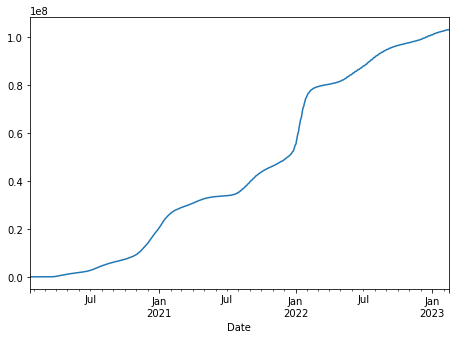

In [ ]:
us_overall.plot(y="conf_cases", legend=None, figsize=(7.5,5))

Through the plot above, it is reasonable to conclude that the growth rate is plateauing after the sudden surge around June 2022. One possible reason for the cause for the initial surge we suspect, is because June and July are the popular months that people would like to go on vacation. This might increases the chance of contact. Another reason could be that there was a policy change over mask wearing, as a result more and more people stoped wearing mask like they used to. Not wearing mask might also be a reason that led to the increase of infection.

We then utilized the daily increase for covid confirmation to plot a daily increase plot. This plot illustrate the rate of change better than the one we got above.

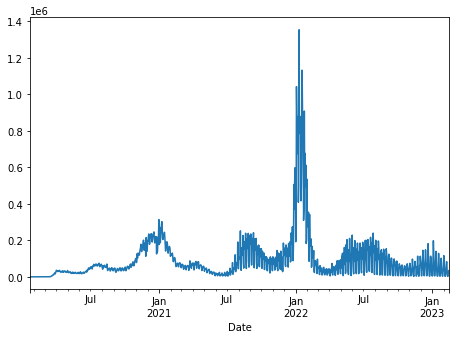

In [ ]:
us_overall.plot(y="conf_change", legend=None, figsize=(7.5,5))

What we discovered in the first plot is also illustrated by this plot. Indeed, this plot captures more change comparing to the first one because of the nature of derivatives. As we can see, the surge in confirmation numbers is more drastic in this plot.

**2.1.2** Deaths trend in the US

We then utilized the data in our us_overall to plot for the cumulative death rate.

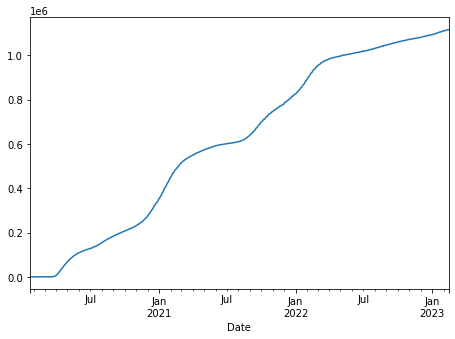

In [ ]:
us_overall.plot(y="death_cases", legend=None, figsize=(7.5,5))

There has always been a steady growth in the cumulative death rate just like that of cumulative confirmation rate. However, one noticeble fact we could see from this plot is around the time that a sudden surge occurrs to the covid confirmation number, the total death number did not change much. We suspect that is due to the fact that the sympton of covid is more mild comparing to how it was in the very beginning

Down below is the daily increase plot we plotted with the data from our us_overall data frame.

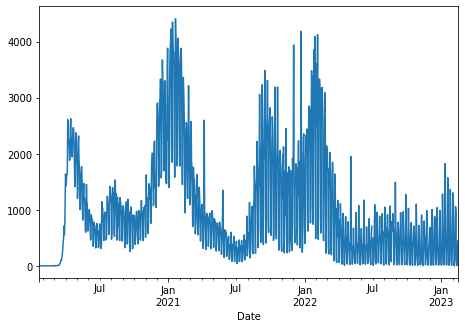

In [ ]:
us_overall.plot(y="death_change", legend=None, figsize=(7.5,5))

This plot could also illustrates the point we claimed above. Death rate through July 2021 to 2022 fluctuates between 1000 to 4000 people per day, but there is no direct correlation to the sudden surge around June 2022.

#### 2.2 Trend among all regions in the US

Now lets look at the nine specific states we talked about in the first part.



* New England: Maine
* Middle Atlantic: New York
* East North Central: Wisconsin
* West North Central: Kansas
* South Atlantic: Maryland
* East South Central: Alabama
* West South Central: Texas
* Mountain: Arizona
* Pacific: California

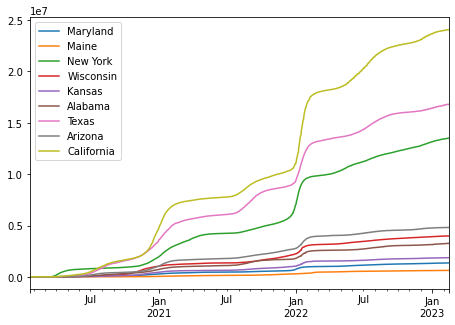

In [ ]:
confirmed.plot(figsize=(7.5,5))

Confirmed cases in nine states continue to trend upward. It is obvious that the number of confirmed cases in June of 2022 increased significantly, meaning all of the states above shared the same tendency as the overall confirmation tendency. Also, it is worth noticing that more states by the coasts have higher cumulative comfirmation rates. This is mainly due to the fact that coast areas have a higher urban population, and they are more likely to cointain a higher porportion of worldwide transportaion.


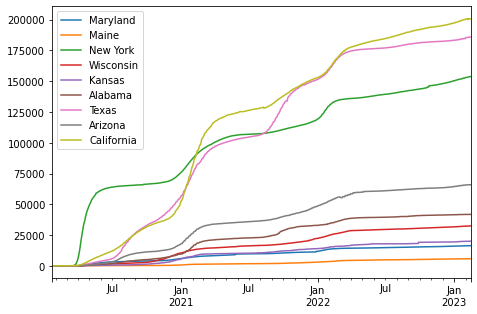

In [ ]:
death.plot(figsize=(7.5,5))

We then did the same thing to the 9 states selected as what we did to the global confirmed and death database-- we calculated the daily increase  in confirmation rates throughout the nine selected states and transposed the dataframe.

In [ ]:
# some basic data cleaning to get rid variables that we won't use
result = result.drop(result.columns[[0,1,2,3,4,7,10]], axis=1)
result = pd.melt(result, ['Admin2','Province_State', 'Lat', 'Long_'], var_name="Date", value_name='Cases')
result = result.drop(columns=['Province_State'])
result = result.rename(columns={'Admin2': 'Admin', 'Long_': 'Long'})
result["Date"] = pd.to_datetime(result['Date'])
result = result.groupby(['Admin', 'Date']).sum()

# creating a intermediate variable that could help calculate the daily increase
result["Next_day"] = result['Cases'].shift(fill_value=0)
result["Daily_change"]= result['Cases'] - result['Next_day']
result = result.drop(columns=['Next_day'])
result = result.reset_index()
result = result[result["Daily_change"] >= 0]

To illistrate the change better, we put them into the US map and represent the daily increases in confirmed cases as a heat map. Below is the code we used to generate the heat map.

In [ ]:
result["Date"] = result["Date"].astype(str)
fig = px.scatter_geo(result, lat="Lat", lon="Long",
                     hover_name="Admin", size="Daily_change",size_max=80,
                     animation_frame="Date",
                     scope = "usa",
                     title = "Total Cases")
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 50
fig.show()

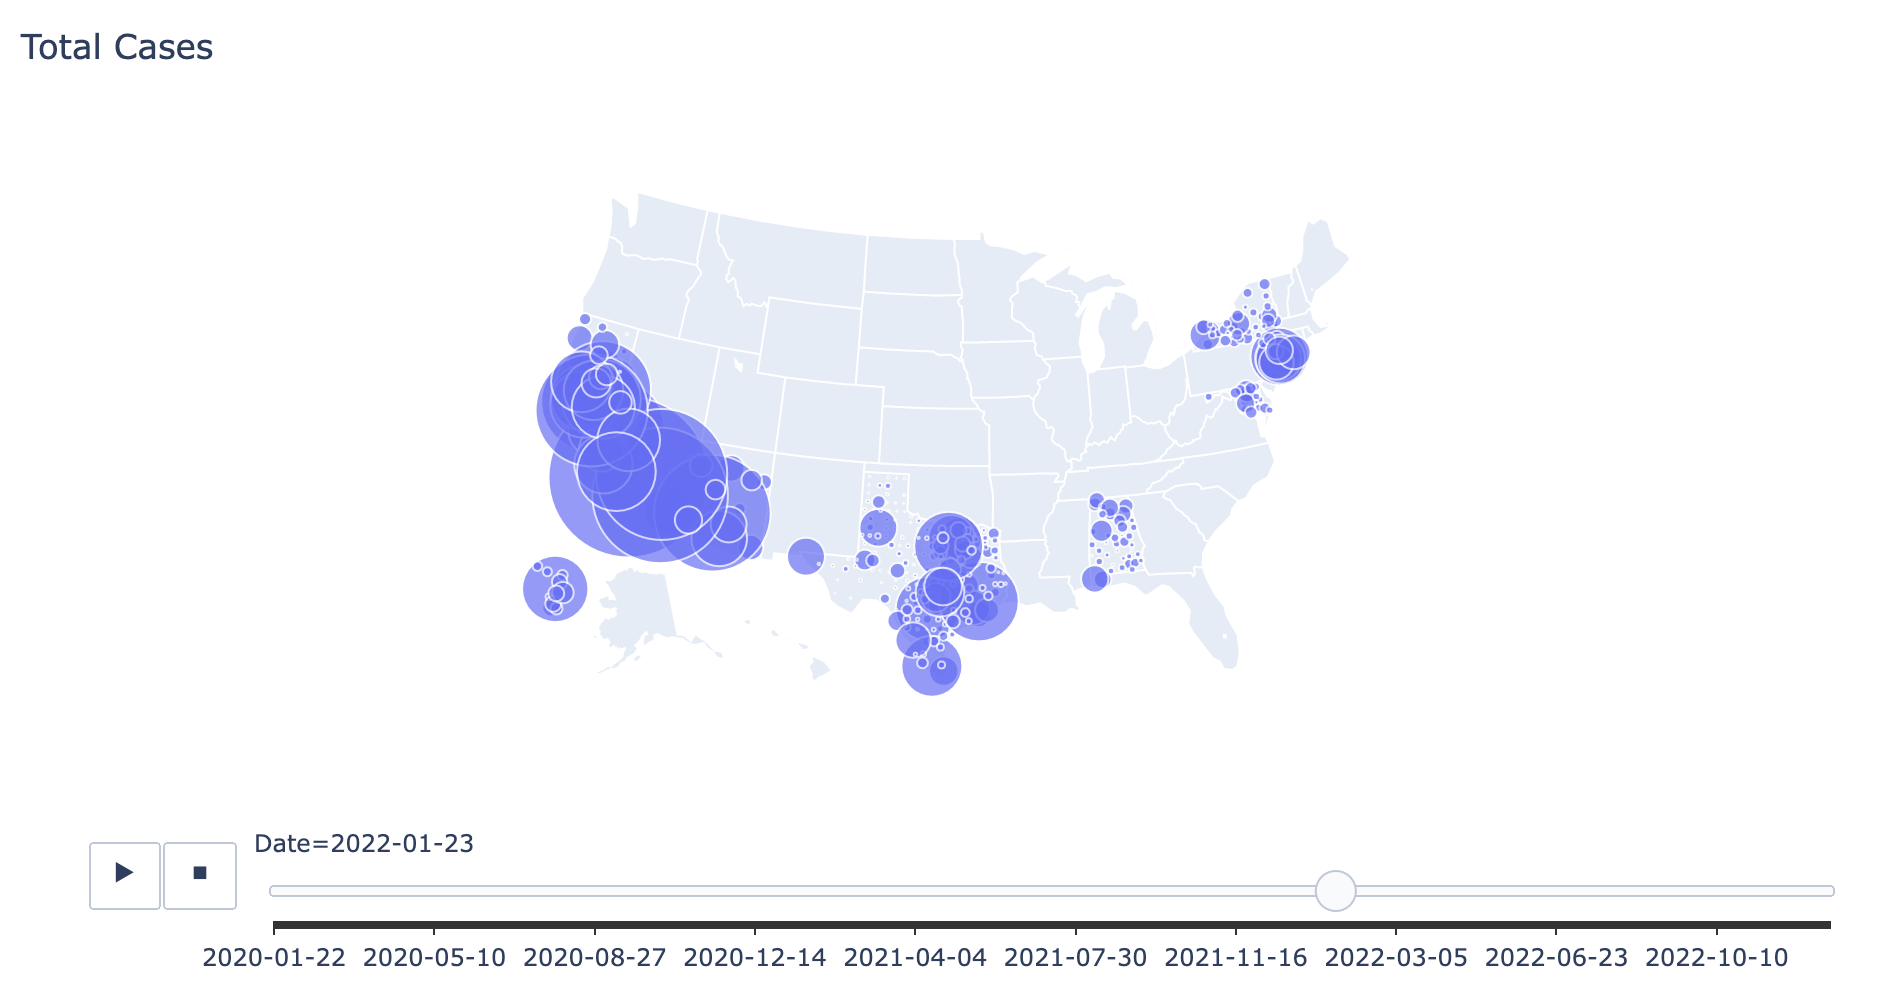

### 3. Hypothesis testing
As we talked about how the growth of covid confirmation rate is disorportional to that of death rate we suspected that the covid symptons nowadays are getting more mild. Therefore, we would want to test whether the mortality rate is lower than before.

The mid point of covid is roughly in the middle of June. So we would set that as a middle point and conduct hypothesis testing for the data before the middle of June 2021 and data after.

$H_0$: the mean proportion of death before June 2021 is less than or equal to that after June 2021

$H_\alpha$: the mean proportion of death before June 2021 is greater than that after June 2021

Here is a visualization of the covid mortality rate. There seems to be a tendency that slowly went down little by little.

In [ ]:
# we calculate the proportion using a lambda function as shown below
us_overall['proportion'] = us_overall.apply(lambda row: row['death_change'] / row['conf_change'], axis=1)
us_overall.plot(y = 'proportion', legend=None, figsize=(7.5,5))

After analyzing the mortality rate data, we did some data cleaning. We first got rid of all the NaN values, then we split the dataframe in half.

In [ ]:
us_overall = us_overall.dropna()
first = us_overall.head(515)
last = us_overall.tail(515)

We then did a paired t-test on both sets of data as shown below.

In [ ]:
stats.ttest_ind(last["proportion"], first["proportion"], axis=0, equal_var=True)

The result p-value for the paired t-test is roughly 1.57e-41, which is significantly less than the alpha value of 0.05. Therefore we could reject the null hypothesis that the mean proportion of death before June 2021 is equal to that after June 2021. So then we could conclude that there might be a decrease in the covid mortality rate.


---



## **Part 2:** COVID and housing price

###1. Data Collection
In this part of the project, we want to see the correlation between housing prices and covid confirmation rate. Since we already have the covid dataset ready, in this part we would want to ellaborate more on the housing data that we obtained.

We gathered our housing data from https://www.fhfa.gov/DataTools/Downloads/Pages/House-Price-Index.aspx. In this dataset we have all nine reigons in the US as columns and monthly HPI on each row. Below is some background regarding the HPI.


> The FHFA House Price Index (FHFA HPI®) is the nation’s only collection of public, freely available house price indexes that measure changes in single-family home values based on data from all 50 states and over 400 American cities that extend back to the mid-1970s.  The FHFA HPI incorporates tens of millions of home sales and offers insights about house price fluctuations at the national, census division, state, metro area, county, ZIP code, and census tract levels.  FHFA uses a fully transparent methodology based upon a weighted, repeat-sales statistical technique to analyze house price transaction data.

In [ ]:
housing = pd.read_csv("/content/HPI_PO_monthly_hist.csv")
housing.index = pd.to_datetime(housing['Month'])
housing = housing.drop(columns=["Month"])
housing = housing.drop(housing.index[0])
housing.head()

### 2. Data management/representation + Exploratory data analysis


To better illustrate the tendency of housing price, we plotted a month vs HPI plot.

In [ ]:
housing.plot(y="USA", legend=None, figsize=(7.5,5))

The housing price for the US as a whole have been steadily rising till recently. It somehow started to drop by around May 2022. Because it was steadily increasing along with the covid confirmation number, we suspect that there would be a positive correlation between the two variables.

We then plot the month vs HPI plot for all nine reigons. We also left the line chart in the plot for the US as well for reference.


In [ ]:
housing.plot(figsize=(7.5, 5))

All different areas also have the same tendency, which gives us more confidence on creating multiple regression models with good fit for these states.

### 3. Linear regression analysis & Hypothesis testing

Here is a reference on what reigon and state we are doing regression on:

* New England: Maine
* Middle Atlantic: New York
* East North Central: Wisconsin
* West North Central: Kansas
* South Atlantic: Maryland
* East South Central: Alabama
* West South Central: Texas
* Mountain: Arizona
* Pacific: California

In [ ]:
us_overall = us_conf.join(us_death, how='outer')

Here we integrated the three data frames so that all we could have the data aligned for the same date

In [ ]:
first = confirmed[confirmed.index.day == 1]
first = first.drop(first.index[[33, 34, 32]])
first2 = us_overall[us_overall.index.day == 1]
first2 = first2.drop(first2.index[[34,33,32]])
hypo = pd.concat([housing, first], axis=1)
hypo = pd.concat([hypo, first2], axis=1)
hypo = hypo.rename(columns={'East North Central': 'East_North','East South Central': 'East_South','Middle Atlantic': 'Middle_Atlantic','New England': 'New_England','South Atlantic': 'South_Atlantic', 'West North Central': 'West_North', 'West South Central': 'West_South', 'New York': 'New_York'})
hypo.head()

We then plotted the regression plot for the covid confirmation cases and HPI in the US. Futerhmore, we extracted the correlation determination to showcase how good our line fits the data points. In the end, to test on the sigificance of the regression result, we ran a regression test.

In [ ]:
# data that we use for this regression relation
a = np.array(first2["conf_cases"].values.reshape(-1, 1))
b = np.array(hypo["USA"].values)
m = linear_model.LinearRegression().fit(a,b)

# Plotting a linear regression
plt.plot(a,b,'k.')
plt.plot(a, m.predict(a))
plt.xlabel("confirmation")
plt.ylabel("HPI")
plt.show()

print(("Coefficient of determination for covid confirmation in USA and housing price in USA"))
print(str(m.score(a,b)))

# regression testing to be generated by ols
result = o(formula = "conf_cases ~ USA", data = hypo).fit()
print (result.summary())


Interestingly, the line fits the datapoints realy well.
As we can see, the $R^2$ value is 0.954. So, 95.4% of the HPI can be explaind by the number of covid comfirmed. In addition to that the p-value for the f-statistic in rather low (lower than default $\alpha$ 0.05) which indecates that we would be rejecting the null hypothesis $\beta_0 = 0$. This further indecates that regression relation exists.

For the nine reigons specifically, we run everything we did for the US as discribed above in a loop for nine times.

In [ ]:
hypo_state = ["Maine", "New_York", "Wisconsin", "Kansas", "Maryland", "Alabama", "Texas", "Arizona", "California"]
hpi = ["New_England", "Middle_Atlantic", "East_North", "West_North", "South_Atlantic", "East_South", "West_South", "Mountain", "Pacific"]
for s, h in zip(hypo_state, hpi):
  # data that we use for this regression relation
  a = np.array(hypo[s].values.reshape(-1, 1))
  b = np.array(hypo[h].values)
  m = linear_model.LinearRegression().fit(a,b)

  # Plotting linear regressions
  print ("Regression Plot for "+ s + " and " + h +":")
  plt.plot(a,b,'k.')
  plt.plot(a, m.predict(a))
  plt.xlabel("confirmation")
  plt.ylabel("HPI")
  plt.show()

  print(("\n\nCoefficient of determination for covid confirmation in " + s + " and housing price in " + h +":"))
  print(str(m.score(a,b)))

  # regression testing to be generated by ols
  result = o(formula = s + " ~ " + h, data = hypo).fit()
  print (result.summary())
  print ("*********************************************************************************************")
  print()

Baring the result of the regression relation of the US as a whole in mind, all the results from the regression relation and test above are somewhat expected. We have half of the data with $R^2$ value greater than that of the overall, half of them less than that of the US.

This result is also somehow unexpected because we only selected 9 representative states from all 50 states. So the data might be somewhat biased. However, the result shows stronger correlation than what we were expecting.

looking at the results we generated, we can see that the coefficient for 9 states are all greater than 0.7, which tell us that the change in House Price Index (HPI) and number of confirmed in each state has strong relationship.

All the p-values that we obtained for the f-statistics are pretty low, which indecates that we would be rejecting the null hypothesis $\beta_0 = 0$. This further indecates that regression relation exists.


## **Part 3:** Insights attained

Looking at the line plot of all the COVID-19 data for the past 3 years, we see that everything has been flattening out at this point of the development of COVID.

One noticable fact that occurs to us is that the mortality rate's relationship is only slightly correlated to the confirmation rate. The death rate flunctuates a lot but it rarely goes along with the extreme values of the confirmation rate. It could be due to the fact that people are noe immune to the virus or tha thte virus itself has a become more mild.

This is also supported by our paired t-test where we statistically proved that the mean motality rate for the first half of COVID is higher than that of the second half.

Aother fact we want to emphasize is that the number of confirmed COVID cases is closely related to the housing prices in almost every reigon, and all the correlations seem to be outstandingly strong. And all of them comes with good p-values.

In the future, we can expand the data points used to many more individual states rather than represntative states for ecah region, so that we can see whether or not the correlation between the housing markets and the confirmed COVID cases will continue to be a strong trend, or if certain states/areas are immune to the effects it is supposed to have on the housing prices.



In [ ]:
!jupyter nbconvert --to html /content/CMSC320_Final.ipynb

[NbConvertApp] Converting notebook /content/CMSC320_Final.ipynb to html
[NbConvertApp] Writing 1535246 bytes to /content/CMSC320_Final.html
